## Introduction to the Effective Mass Model

The outline of this section generally follows the books of V.I. Firsul' and P.S. Kireev with additional contributions taken from the book of B.M. Askerov.

In solids, electron transport can be described in the Boltzmann transport theory framework.

The effective mass model can be applied to materials with carrier transport dominated by majority carriers with a single scattering mechanism. In this case, the energy dependence of the relaxation time $\tau$ depends on the scattering mechanism and is expressed by a simple power-law:

```math
\tau(\varepsilon) = \tau_0 \varepsilon^r
```

Here, $\tau_0$ is a reference relaxation time for carriers at $k_{\mathrm{B}}T$,
$\varepsilon = \frac{E}{k_{\mathrm{B}}T}$ represents the reduced carrier energy,
and $r$ represents the scattering factor
($r = -\frac{1}{2}$ for acoustic phonon scattering,
$r = \frac{1}{2}$ for polar optical phonon scattering,
$r = \frac{3}{2}$ for ionized-impurity scattering, etc.).

Using the expression for the density of states:

```math
g(E) = \frac{1}{2\pi^2} \left( \frac{2m_d^{\ast}}{\hbar^2} \right)^{3/2} \sqrt{E}
```

and the Fermi-Dirac distribution function:

```math
f(E, \mu) = \frac{1}{1 + \exp\left(\frac{E - \mu}{k_{\mathrm{B}}T}\right)}, \quad
E = \frac{\hbar^2 k_{\mathrm{B}}^2}{2m_d^{\ast}} \text{ (for single parabolic band)}
```

the charge carrier concentration can be obtained as:

```math
n = \int_0^{\infty} g(E) f(E) \, dE 
= 4\pi \left( \frac{2m_d^{\ast}k_{\mathrm{B}}T}{h^2} \right)^{3/2} F_{1/2}(\eta)
```

Here:

 $m_d^{\ast}$ is the density of states effective mass,
  defined as $m_d^{\ast} = N_v^{2/3}(m_x^{\ast} m_y^{\ast} m_z^{\ast})^{1/3}$,
 $N_v$ is the valley degeneracy factor,
 $h$ is the Planck constant,
 $E$ is the carrier energy measured from the conduction band bottom $E_c$ (or valence band maximum $E_v$),
 $\mu$ is the chemical potential,
 $\eta = \mu / k_{\mathrm{B}}T$ is the reduced Fermi energy (reduced chemical potential),
 $F_{1/2}(\eta)$ is the Fermi integral of order 1/2.

The general Fermi integral of order $j$ is defined as:

```math
F_j(\eta) = \int_0^{\infty} \frac{\varepsilon^j}{1 + \exp(\varepsilon - \eta)} \, d\varepsilon
``` 
with $\eta = \mu / k_{\mathrm{B}}T$ representing the reduced Fermi energy, also known as the reduced chemical potential.

In the Boltzmann transport theory framework with the relaxation time approximation, the thermopower is expressed as:

```math
\alpha = \pm \frac{k_{\mathrm{B}}}{e} \left[
\frac{\int_0^{\infty} \varepsilon^{5/2} \tau(\varepsilon) \frac{\partial f(\varepsilon)}{\partial \varepsilon} \, d\varepsilon}
{\int_0^{\infty} \varepsilon^{3/2} \tau(\varepsilon) \frac{\partial f(\varepsilon)}{\partial \varepsilon} \, d\varepsilon}
- \eta \right]
```

Using Eqs. for $\tau(\varepsilon)$, the Fermi-Dirac distribution $f(\varepsilon)$, and the Fermi integral, this expression can be simplified to:

```math
\alpha(\eta) = \pm \frac{k_{\mathrm{B}}}{e} \left(
\frac{(r + \tfrac{5}{2}) F_{r + \tfrac{3}{2}}(\eta)}{(r + \tfrac{3}{2}) F_{r + \tfrac{1}{2}}(\eta)} - \eta
\right)
```

> **Note:** This formula assumes the chemical potential does not depend on temperature, i.e., $\eta \approx E_{\mathrm{F}} / k_{\mathrm{B}}T$. This approximation may not be valid in all cases, especially near intrinsic or degenerate limits. For a more detailed overview of the influence of the temperature dependent chemical potential on thermopower we refer the reader to the following paper [Takeuchi et al. (https://www.jstage.jst.go.jp/article/matertrans/51/3/51_M2009349/_article)].


In [2]:
import scipy.constants as sc
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker
import numpy as np
from fdint import fdk
Fermi = fdk
from scipy.optimize import root
from scipy.optimize import root_scalar
import pandas as pd
from numpy.polynomial import Polynomial
import matplotlib.ticker as ticker

In [21]:
def a_SPB(eta,r=-0.5,chargeSign=1.0):
    '''
    Calculates thermopower [mkV/K], assuming tau~x**r
    r - scattering parameter (e.g. r=-0.5 for acoustic, r=1.5 for ionized impurity scattering)
    eta - chemical potential
    chargeSign - optional sign of carrier charge
    '''
    alpha = chargeSign*sc.k/sc.e*(((r+2.5)*Fermi(r+1.5,eta))/((r+1.5)*Fermi(r+0.5,eta))-eta)*10**6
    return alpha

def a_SPB_nondeg(eta,r=-0.5,chargeSign=1.0):
    '''
    Calculates thermopower [mkV/K] for nondegenerate region, assuming tau~x**r and Boltzmann statistics
    r - scattering parameter (e.g. r=-0.5 for acoustic, r=1.5 for ionized impurity scattering)
    eta - chemical potential
    chargeSign - optional sign of carrier charge
    '''
    alpha = chargeSign*sc.k/sc.e*(r+5/2-eta)*10**6
    return alpha

def a_SPB_deg(eta,r=-0.5,chargeSign=1.0):
    '''
    Calculates thermopower [mkV/K] for degenerate region, assuming tau~x**r and Fermi-Dirac statistics
    r - scattering parameter (e.g. r=-0.5 for acoustic, r=1.5 for ionized impurity scattering)
    eta - chemical potential
    chargeSign - optional sign of carrier charge
    '''
    alpha = chargeSign*sc.k/sc.e*sc.pi**2/3*(3/2+r)/eta*10**6
    return alpha

In [9]:
eta = np.linspace(-20,20,1000)
r = -1/2
md = 1 #doesn't matter
T = 300 #doesn't matter

Text(7.5, 717.5, 'degenerate')

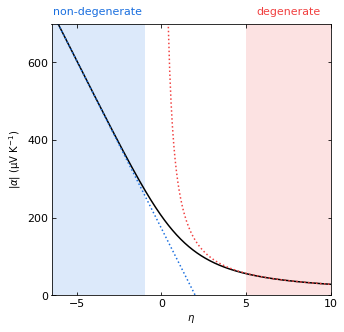

In [ ]:
fig = plt.figure(1, figsize=(5,5), linewidth=5.0)
plt.plot(eta, a_SPB(eta,r=r), linestyle='-', color='k', label=r'Full numerical solution', zorder=1)
eta_deg = np.linspace(0.01,20,500)
plt.plot(eta_deg, a_SPB_deg(eta_deg,r=r), linestyle=':', color='#f14040', label = r'Degenerate limit', zorder=0) #degenerate SPB curve
plt.plot(eta, a_SPB_nondeg(eta,r=r), linestyle=':', color='#1a6fdf', label =r'Non-degenerate limit', zorder=0) #nondegenerate SPB curve
x_min = -6.5
x_max = 10
y_min = 0
y_max = 700

plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])

plt.tick_params(direction='in',which='major', length=3.5, bottom=True, top=True, left=True, right=True)
yticks = np.arange(0,y_max+1,200)
plt.yticks(yticks)
xticks = np.arange(-5,x_max+0.1,5)
plt.xticks(xticks)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True, labelsize=11)
plt.ylabel(r'$|\alpha|$ ($\mathrm{\mu}$V K$^{-1}$)')
plt.xlabel(r'$\eta$')

plt.axvspan(x_min,-1, color='#1a6fdf', alpha=0.15, lw=0)
plt.axvspan(5,x_max, color='#f14040', alpha=0.15, lw=0)
plt.text((x_min+1)/2-1, y_max+y_max*0.025, 'non-degenerate', ha='center', va='bottom', zorder=5, fontsize=11, color='#1a6fdf')
plt.text((x_max-5)/2+5, y_max+y_max*0.025, 'degenerate', ha='center', va='bottom', zorder=5, fontsize=11, color='#f14040')